<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Fake_News_Detection_PH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection PH
Dataset: https://huggingface.co/datasets/fake_news_filipino

Task: text-classification NLP

Contains 3,206 expertly-labeled news samples, half of which are real and half of which are fake.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno

# Data Exploration

In [54]:
df = pd.read_csv('fakenews_data_ph.csv')

In [55]:
df.head()

,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


In [56]:
df.tail()

,label,article
3201,1,Hindi pa nai-enjoy ni Giacomo Filibeck ang Pil...
3202,1,"Sa isang pahayag, binatikos ng Liberal Party (..."
3203,1,Panoorin nyo yung reaction video na ito ni Mr....
3204,1,Para sa mga magkakapatid na laging nagtatalo l...
3205,1,Grabe ibang klase talaga si Vice Ganda kung ma...


In [57]:
df.describe()

,label
count,3206.000000
mean,0.500000
std,0.500078
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


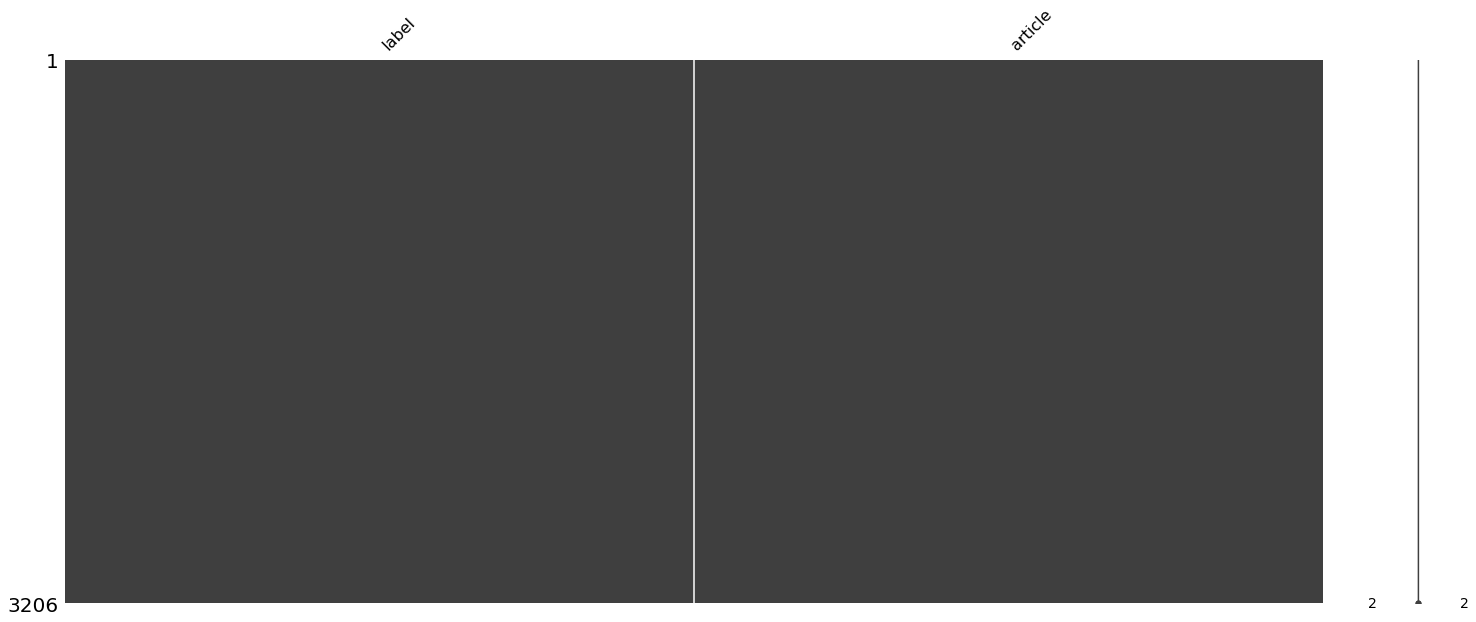

Missing: 0


In [58]:
missingno.matrix(df)
plt.show()
print("Missing: {}".format(df.isna().sum().sum()))

## Shuffling Dataset

In [59]:
from sklearn.utils import shuffle

df = shuffle(df).reset_index(drop=True)

In [60]:
df.head()

,label,article
0,0,"""We will start with the training camp for thos..."
1,0,Agad na lumutang ang tanong: Bakit humiling an...
2,1,Para sa mga magkakapatid na laging nagtatalo l...
3,1,Binigyan ng kredito ni dating Senador Bong Rev...
4,0,NAGSIMULA nang magbigay ng Performance-Based B...


In [61]:
df.tail()

,label,article
3201,1,Walang habas na tinabangan ng mga rebeldeng Ne...
3202,1,Usap-usapan ngayon sa social media ang umano'y...
3203,1,Hiniling ng Partido Liberal sa Commission on E...
3204,1,Nag-viral ngayon sa social media ang pagtulong...
3205,0,"Tulad ng nakaraang mga taon, saan man nakatira..."


In [62]:
df.loc[3201, 'article'] # 0

"Walang habas na tinabangan ng mga rebeldeng New people's Army (NPA) ang mga Philippine National Police (PNP) sa region 5 na nagsasagawa lamang ng medical mission sa isang liblib na lugar sa Bicol. Ikinagagalit ngayon ng isang pulis ang sinapit ng mga kasamahan niya dahil sa tusong pag-atake ng mga rebelde. Sa Facebook post ni Raymund Raposa, natanong niya kung bakit kailangan pang tambangan ng NPA pati ang mga medical teams na tumutulong sa mga kababayan natin na mahihirap. Isa sa mga nasugatan ay na sa kritikal na kondisyon matapos tamaan ng shrapnel. Buti na lang at may sapat na puwersa ang mga pulis at sundalo para depensahan ang mga kasamahan nilang nasugatan. Kinilala ang mga sugatan na sina PO3 Roland Hermogeno, PO1 Vladimir Guadalupe, PO1 Roy Carbonell, PO1 Eliseo Jomar Palaroan, PO1 Mikhail Jose Concina and PO1 Daisy Bhel Genova. Ayon sa ilang ulat, nangyari ang pag-atake ng mga rebeldeng komunista sa medical team sa Sitio Patag, Barangay Mambulo Nuevo, Libmanan, Camarines Sur

In [63]:
df.loc[3202, 'article'] # 1

'Usap-usapan ngayon sa social media ang umano\'y panggagaya ng kinatawan ng Thailand na si Ingchanok Prasart sa ginanap na Miss Intercontinental pageant 2018 sa trademark ni Miss Universe 2018 Catriona Gray na "lava walk." Isang netizen sa Twitter na nagngangalang Marnie Raro ang nakapansin sa paraan ng paglalakad at pag-project ni Miss Thailand na parang kinokopya ang "lava walk" ni Catriona. Bukod kay Miss Thailand, napansin din ng mga netizens ang pagkopya umano sa "Mayon Volcano gown" ni Miss Vietnam. Aminado naman ang dalawa na labis nilang hinahangaan at inspirasyon nila si Miss Universe 2018 Catriona Gray. Halo-halo naman ang naging reaksyon ng mga netizens hinggil dito. "So now everyone looks like Catriona Gray. From hair to stance to gowns. The influence. Only legends do that." "Catriona Gray\'s walk can never be perfect without her walking it." "I think so? Even the hand gesture of Miss Thailand seems copied too. Catriona Gray is indeed a queen." "Yet they can\'t copy the ori

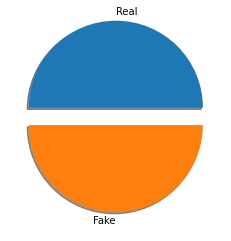

Real news count:  1603
Fake news count:  1603


In [64]:
# 1 == Fake and 0 == Real
real_news = len(df[df['label'] == 0])
fake_news = len(df[df['label'] == 1])
plt.pie([real_news, fake_news], labels=['Real', 'Fake'], explode = [0.2,0.0] , shadow=True)
plt.show()

print("Real news count: ", real_news)
print("Fake news count: ", fake_news)

# Data Preprocessing

## Converting text to lowercase

In [65]:
df['article'] = df['article'].apply(lambda txt: txt.lower())

In [66]:
df.head()

,label,article
0,0,"""we will start with the training camp for thos..."
1,0,agad na lumutang ang tanong: bakit humiling an...
2,1,para sa mga magkakapatid na laging nagtatalo l...
3,1,binigyan ng kredito ni dating senador bong rev...
4,0,nagsimula nang magbigay ng performance-based b...


## Removing Punctuations

In [67]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
def remove_punctuation(txt):
  all_list = [char for char in txt if char not in string.punctuation]
  return ''.join(all_list)

In [69]:
df['article'] = df['article'].apply(remove_punctuation)

In [70]:
df.head()

,label,article
0,0,we will start with the training camp for those...
1,0,agad na lumutang ang tanong bakit humiling ang...
2,1,para sa mga magkakapatid na laging nagtatalo l...
3,1,binigyan ng kredito ni dating senador bong rev...
4,0,nagsimula nang magbigay ng performancebased bo...
